In [1]:
#read Data 
import pandas as pd
import numpy as np


df=pd.read_csv("C:\\Users\\abhishek\\Desktop\\iiitdabhi\\3rdsem\\CGAS\\project\\winequalityN.csv", header = 0)
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### Remove Duplicates rows

In [2]:
#Remove Duplicates  rows
# print(len(df))
print("No of rows before removing duplicate rows",len(df))
df.drop_duplicates( subset=None, keep='first', inplace=True)
print("No of rows after removing duplicate rows",len(df))

No of rows before removing duplicate rows 6497
No of rows after removing duplicate rows 5329


### Find if any row have all null values

In [3]:
row_count, column_count = df.shape
list_of_columns=list(df.columns)
print(row_count, column_count,list_of_columns[len(list_of_columns)-1])


5329 13 quality


In [4]:
kf = df.dropna(how = 'all')
print(df.shape," ",kf.shape)

(5329, 13)   (5329, 13)


#### Result of analysis here we can see that we do not have any row where all columns values are null

## Find Percentage of null value in each column

In [5]:
#analysis2
#find percentage of null values 
df_missing=df.isna()
df_count_missing=df_missing.sum()
per_none_value=df_count_missing/len(df_count_missing)
per_none_value.sort_values(ascending=False,inplace=True)
print("% of null values in each column")
print(per_none_value)

% of null values in each column
fixed acidity           0.769231
pH                      0.692308
volatile acidity        0.615385
sulphates               0.307692
citric acid             0.230769
chlorides               0.153846
residual sugar          0.153846
quality                 0.000000
alcohol                 0.000000
density                 0.000000
total sulfur dioxide    0.000000
free sulfur dioxide     0.000000
type                    0.000000
dtype: float64


### As very less percentage of data have NULL Values we remove all rows which have NULL values in any column

In [6]:
rows_of_coulmn_to_remove=['type', 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']
tf=df
for r in rows_of_coulmn_to_remove:
    tf=tf.drop(tf[tf[r].isna()].index, inplace = False)

In [7]:
((df.shape[0]-tf.shape[0])/df.shape[0])*100


0.6380183899418277

##### here we have deleted around 0.52 % of data

In [8]:
#analysis2
#find percentage of null values 
df_missing=tf.isna()
tf_count_missing=df_missing.sum()
per_none_value=df_count_missing/len(tf_count_missing)
per_none_value.sort_values(ascending=False,inplace=True)
print("% of null values in each column")
print(per_none_value)

% of null values in each column
fixed acidity           0.769231
pH                      0.692308
volatile acidity        0.615385
sulphates               0.307692
citric acid             0.230769
chlorides               0.153846
residual sugar          0.153846
quality                 0.000000
alcohol                 0.000000
density                 0.000000
total sulfur dioxide    0.000000
free sulfur dioxide     0.000000
type                    0.000000
dtype: float64


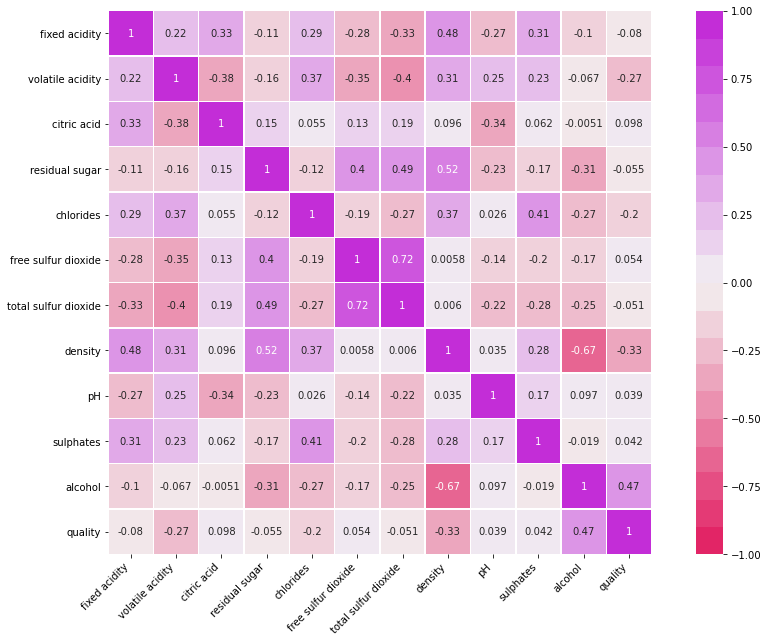

In [9]:
# classification_data
import seaborn as sns
import matplotlib.pyplot as plt
corr = tf.corr()
plt.figure(figsize = (16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 300,s=90, n=20),
    square=True,linewidths=.5,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
df.groupby('quality').size()

quality
3      30
4     206
5    1755
6    2327
7     857
8     149
9       5
dtype: int64

In [11]:
# tf.groupby('quality').size()

In [12]:
print(set(tf['quality']))

{3, 4, 5, 6, 7, 8, 9}


<AxesSubplot:xlabel='quality', ylabel='count'>

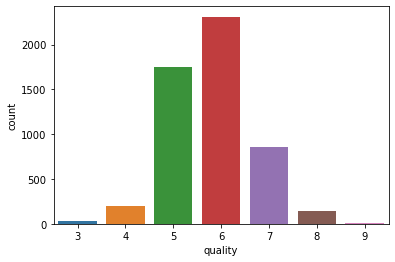

In [13]:
from scipy.stats import norm 
sns.countplot(x='quality', data=tf)

In [14]:
tf["type"]=[1 if x=='white' else 0 for x in tf["type"]]

## OutLier Detection

In [15]:
# https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/

In [16]:
colList=list(df.columns)
colList

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Box Plot

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='type'>

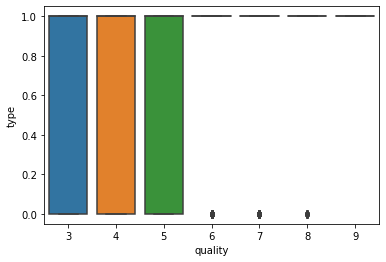

In [17]:
sns.boxplot('quality', 'type', data = tf)

### Scatter plot

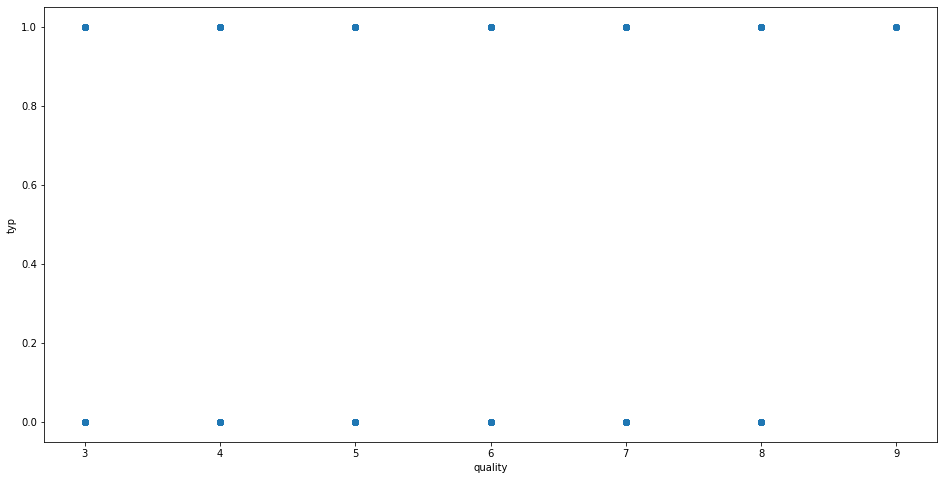

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['type'])
ax.set_xlabel('quality')
ax.set_ylabel('typ')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

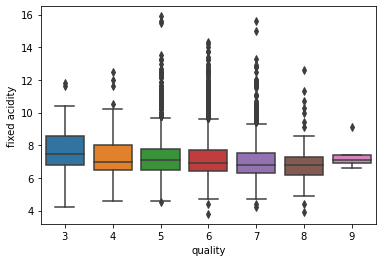

In [19]:
sns.boxplot('quality', 'fixed acidity', data = tf)

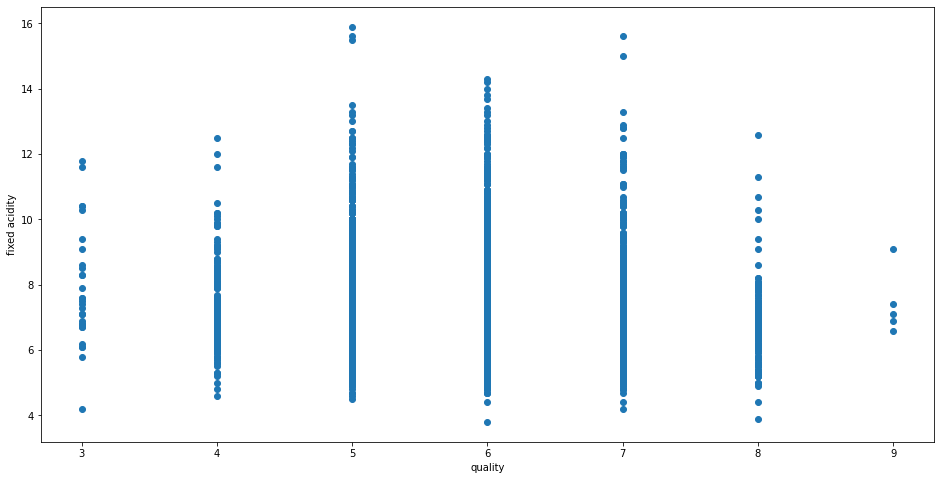

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['fixed acidity'])
ax.set_xlabel('quality')
ax.set_ylabel('fixed acidity')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

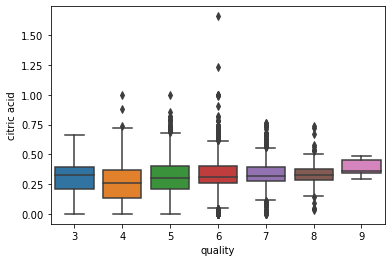

In [21]:
sns.boxplot('quality', 'citric acid', data = tf)

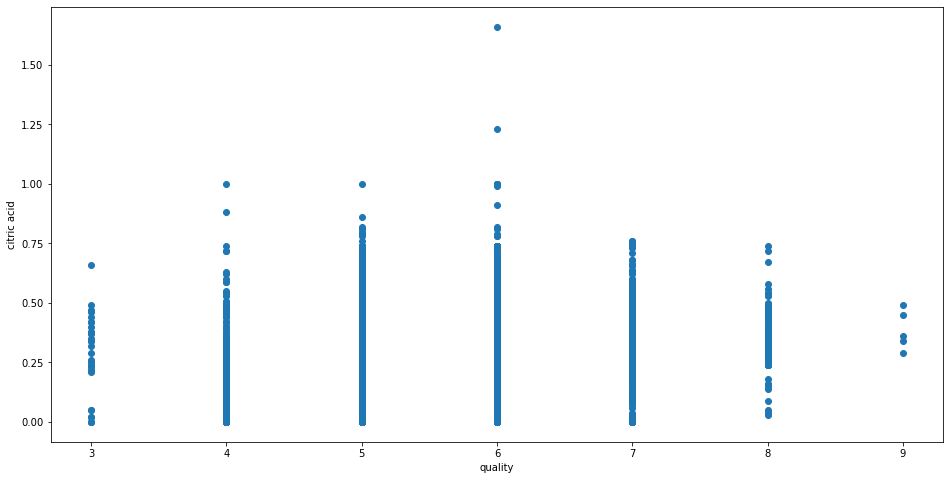

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['citric acid'])
ax.set_xlabel('quality')
ax.set_ylabel('citric acid')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

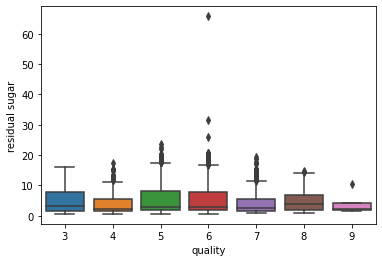

In [23]:
sns.boxplot('quality', 'residual sugar', data = tf)

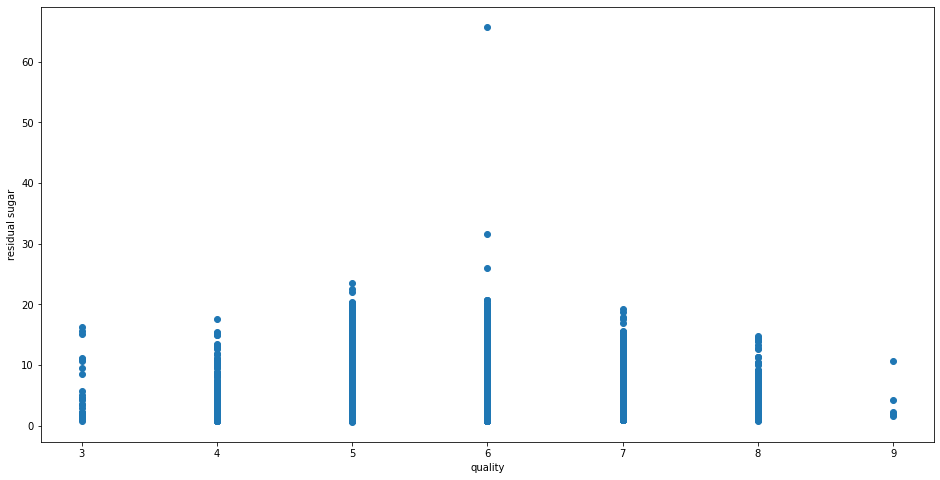

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['residual sugar'])
ax.set_xlabel('quality')
ax.set_ylabel('residual sugar')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

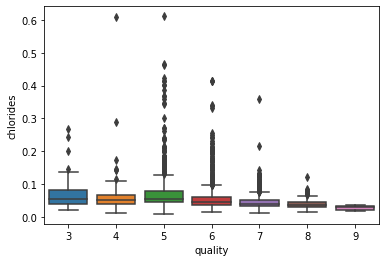

In [25]:
sns.boxplot('quality', 'chlorides', data = tf)

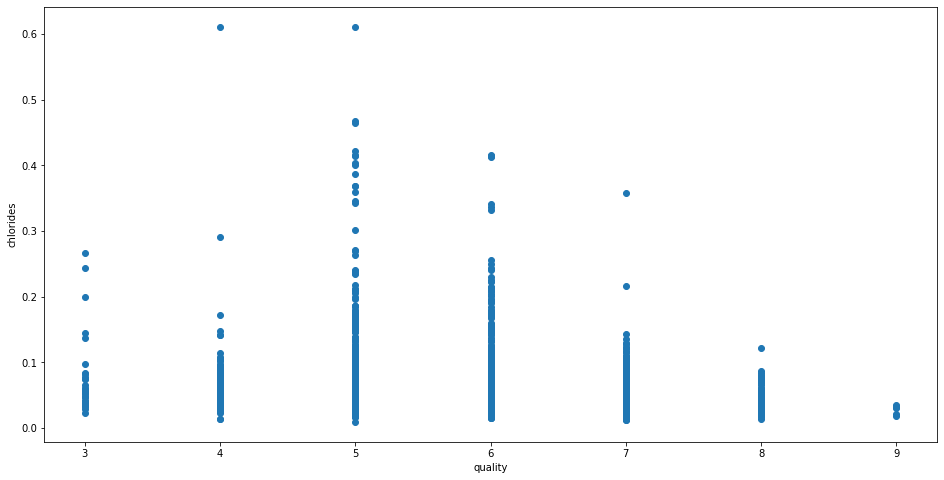

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['chlorides'])
ax.set_xlabel('quality')
ax.set_ylabel('chlorides')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

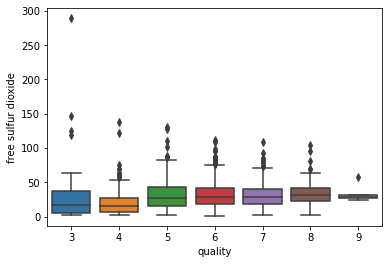

In [27]:
sns.boxplot('quality', 'free sulfur dioxide', data = tf)

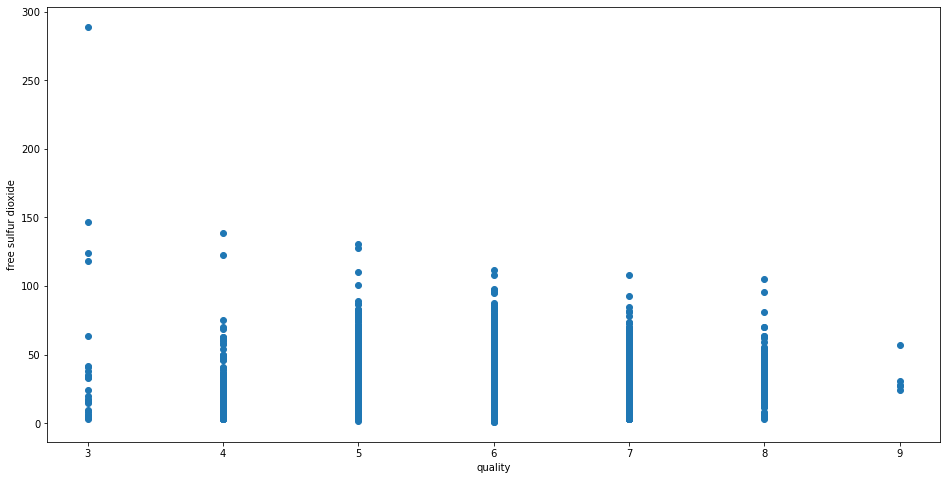

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['free sulfur dioxide'])
ax.set_xlabel('quality')
ax.set_ylabel('free sulfur dioxide')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

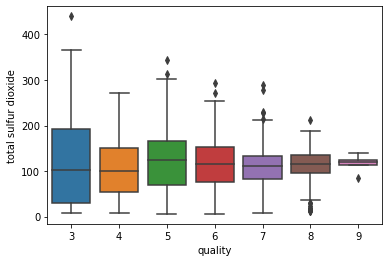

In [29]:
sns.boxplot('quality', 'total sulfur dioxide', data = tf)

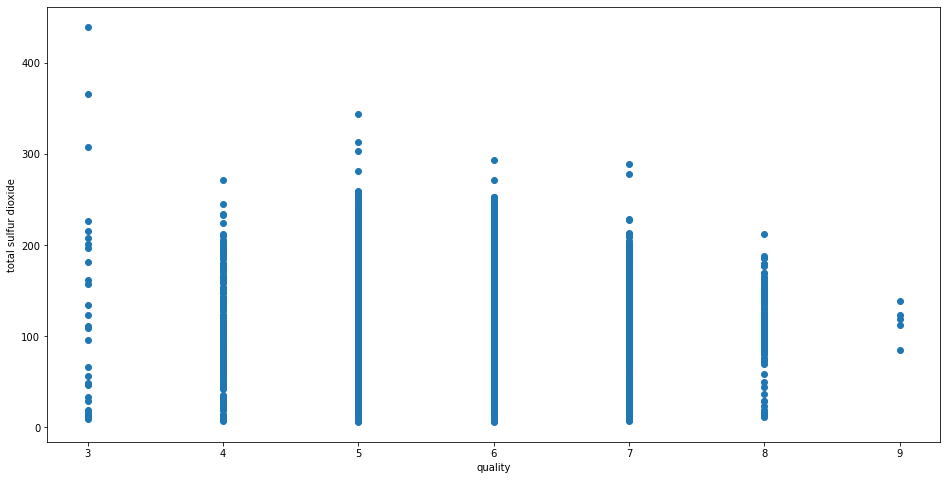

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['total sulfur dioxide'])
ax.set_xlabel('quality')
ax.set_ylabel('total sulfur dioxide')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='density'>

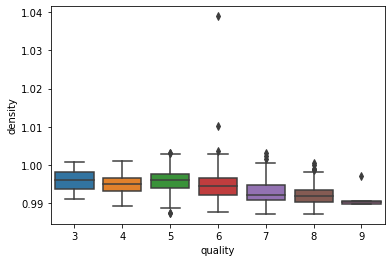

In [31]:
sns.boxplot('quality', 'density', data = tf)

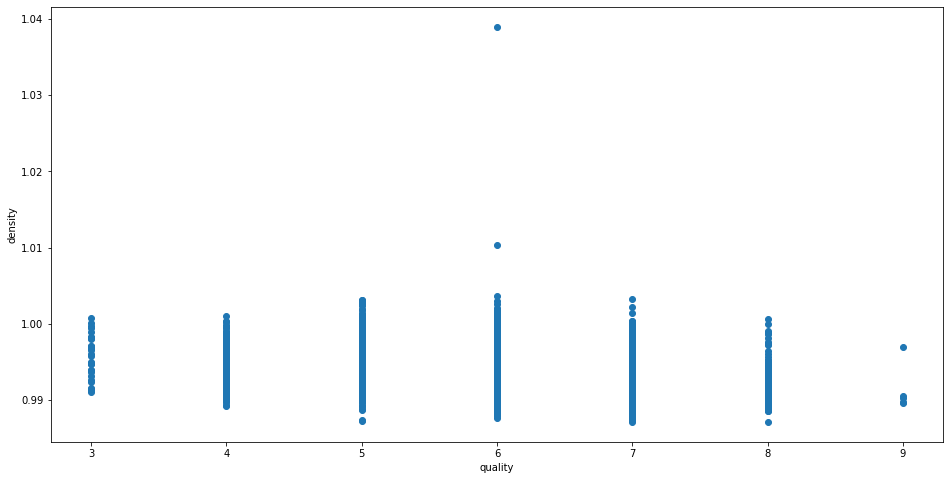

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['density'])
ax.set_xlabel('quality')
ax.set_ylabel('density')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='pH'>

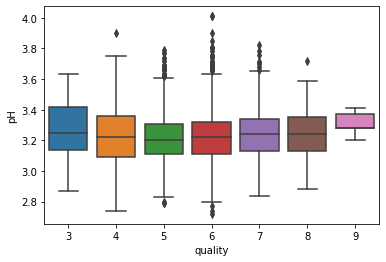

In [33]:
sns.boxplot('quality',  'pH', data = tf)

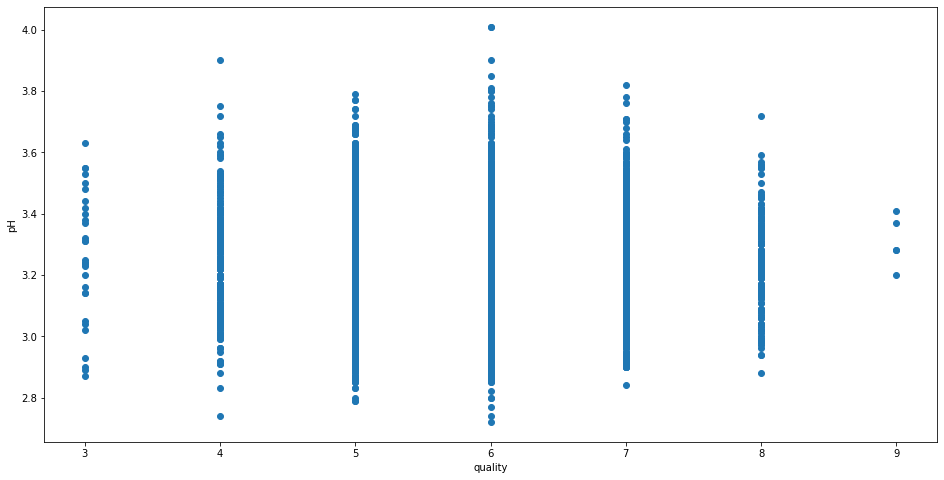

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['pH'])
ax.set_xlabel('quality')
ax.set_ylabel('pH')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

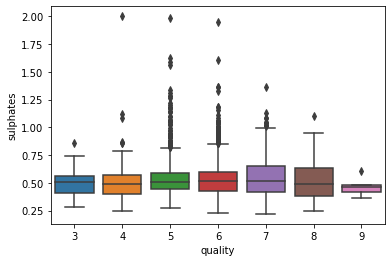

In [35]:
sns.boxplot('quality', 'sulphates', data = tf)

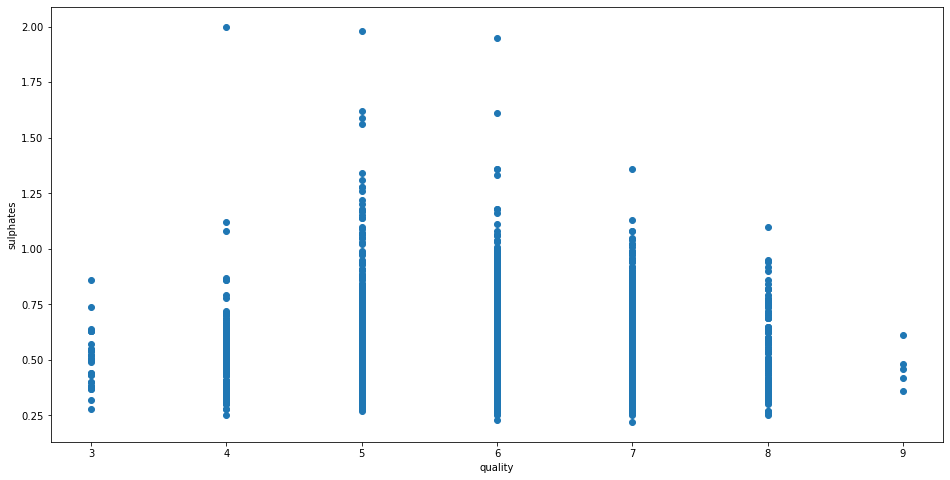

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['sulphates'])
ax.set_xlabel('quality')
ax.set_ylabel('sulphates')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

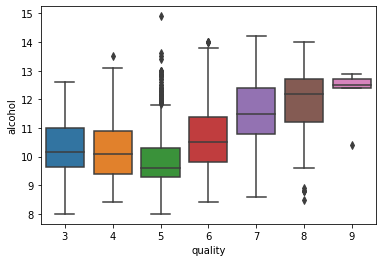

In [37]:
sns.boxplot('quality', 'alcohol', data = tf)

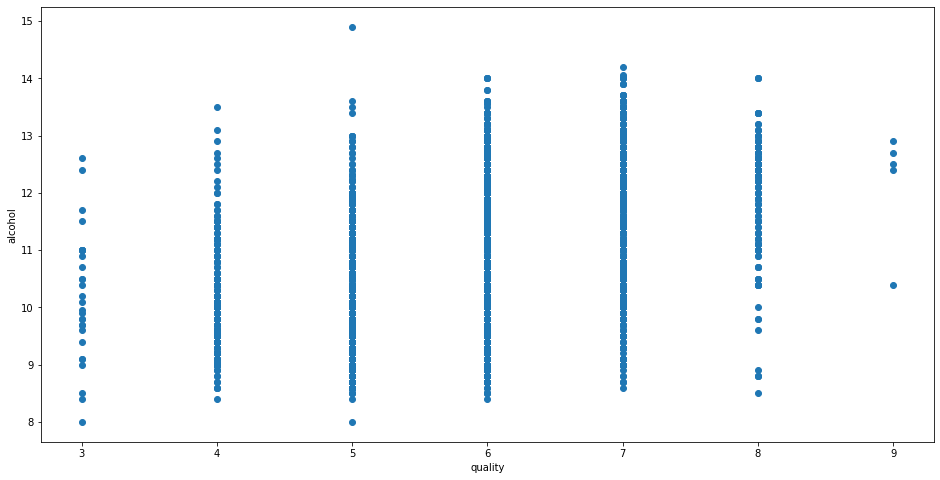

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(tf['quality'], tf['alcohol'])
ax.set_xlabel('quality')
ax.set_ylabel('alcohol')
plt.show()

In [39]:
# import pandas
# data = pandas.DataFrame({'A' : ['X', 'Y'], 
#                         'B' : 1, 
#                         'C' : [2, 3]})
# data.iloc[1]

### Histogram plots

array([[<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

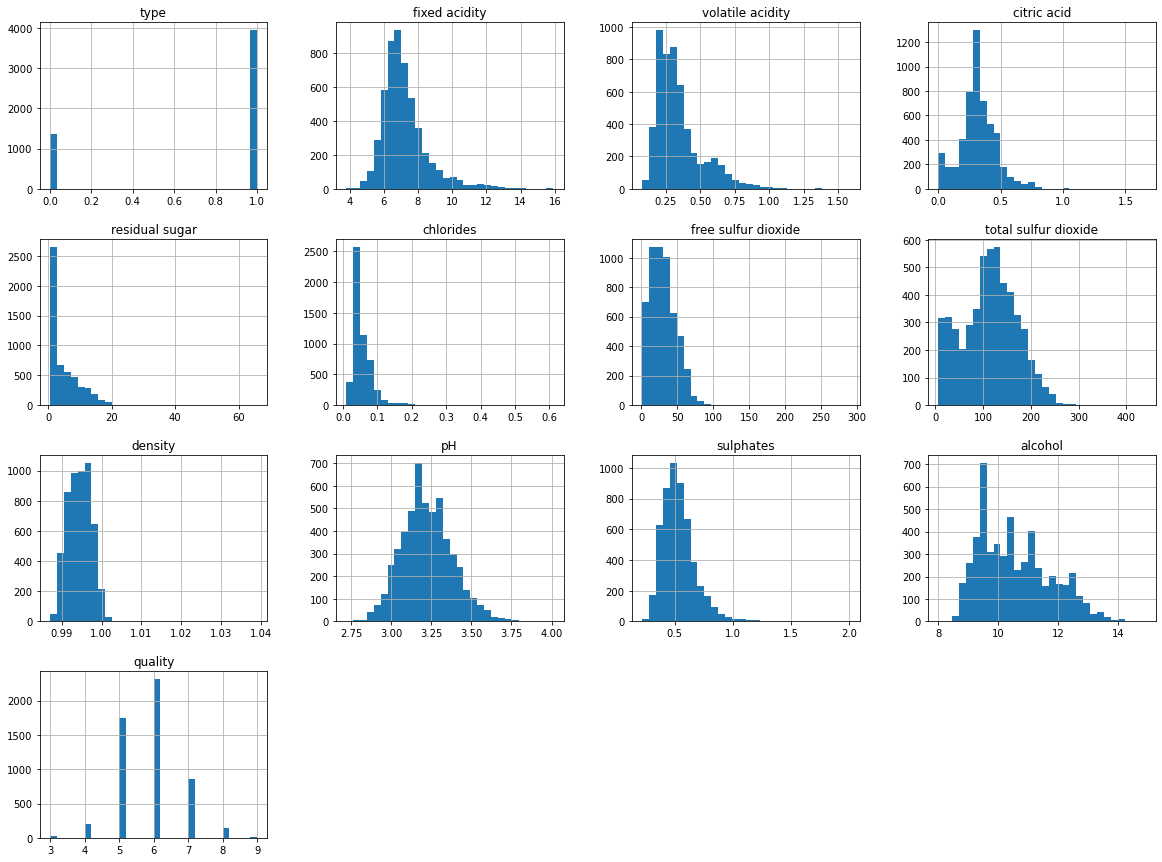

In [40]:
# for x in tf.columns:
#     tf[x].hist()
    
#     print(tf[x])
# for (col in 2:ncol(tf)) {
#     hist(tf[,col])
# }
# pandas.DataFrame.hist
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
tf.hist(figsize=[20,15],bins=30)


In [41]:
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [42]:
# from scipy.stats import norm 
# plt.figure(figsize = (20,22))

# for i in range(1,13):
#     plt.subplot(5,4,i)
#     sns.distplot(tf[tf.columns[i]], fit=norm)

# Removing outliers

## Intial 

<AxesSubplot:xlabel='quality', ylabel='count'>

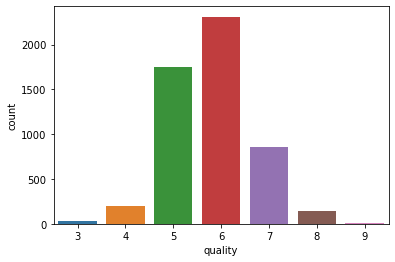

In [43]:
sns.countplot(x='quality', data=tf)

 ## Z-score method for outlier

<AxesSubplot:xlabel='quality', ylabel='count'>

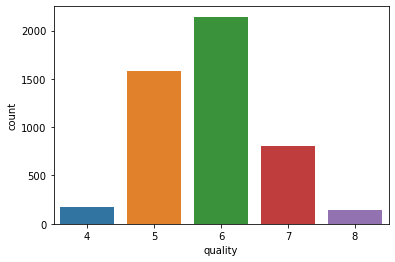

In [44]:

from scipy import stats
kf=tf[(np.abs(stats.zscore(tf)) < 3).all(axis=1)]
sns.countplot(x='quality', data=kf)

## IQR for outlier

In [45]:
Q1 = tf.quantile(0.25)
Q3 = tf.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

<AxesSubplot:xlabel='quality', ylabel='count'>

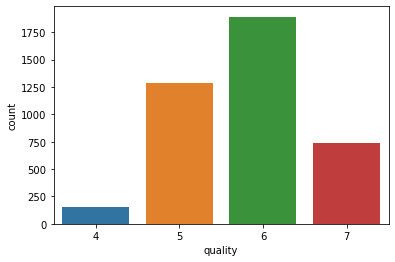

In [46]:
df_out = tf[~((tf < (Q1 - 1.5 * IQR)) |(tf > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_out
sns.countplot(x='quality', data=df_out)

## Box plots change example  before and after outleier removing

### Before removing outiers

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

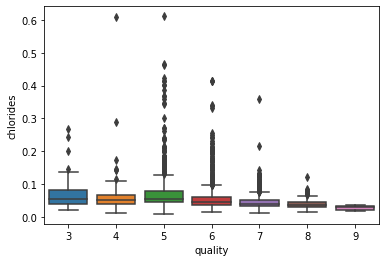

In [47]:
# sns.boxplot(tf['fixed acidity'])
sns.boxplot('quality',  'chlorides', data = tf)

### after using IQR for outlier removing algo same plot look like

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

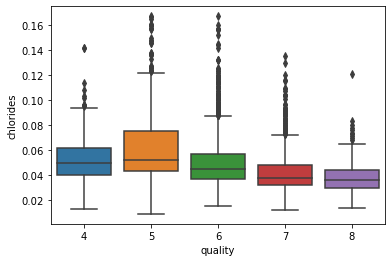

In [48]:
# sns.boxplot(df_out['fixed acidity'])
sns.boxplot('quality',  'chlorides', data = kf)

###  after using Z-score method for outlier removing algo same plot look like

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

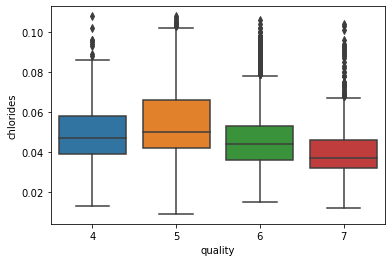

In [49]:
# sns.boxplot(df_out['fixed acidity'])
sns.boxplot('quality',  'chlorides', data = df_out)

In [50]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(tf['quality'], tf['alcohol'])
# ax.set_xlabel('quality')
# ax.set_ylabel('alcohol')
# plt.show()

In [51]:
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df_out['quality'], df_out['alcohol'])
# ax.set_xlabel('quality')
# ax.set_ylabel('alcohol')
# plt.show()

In [52]:
# print(len(df_out),len(tf))
# https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
# https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/

# Implementation on data before removing outiers

# Machine Learning Models for prediction

## Linear Regression Model

In [53]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [54]:
analysis_outlier={}
analysis_outlier["name_of_method"]=[]
analysis_outlier["MAE"]=[]
analysis_outlier["MSE"]=[]
analysis_outlier["RMSE"]=[]
analysis_outlier["R squared"]=[]

In [55]:
X=tf.loc[:, tf.columns != 'quality']
# sc = StandardScaler()
# X=sc.fit_transform(X)
scaler = MinMaxScaler()
X[list(X.columns)]=scaler.fit_transform(X[list(X.columns)])
# X=scaler.fit_transform(X)
y=tf['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the model
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, pred))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(y_test, pred))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared: ',lr.score(X_train,y_train))
# print('R squared: ',lr.score(X_train,y_train))
analysis_outlier["name_of_method"].append("with outliers")
analysis_outlier["MAE"].append(metrics.mean_absolute_error(y_test, pred))
analysis_outlier["MSE"].append(metrics.mean_squared_error(y_test, pred))
analysis_outlier["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
analysis_outlier["R squared"].append(lr.score(X_train,y_train))


MAE (Mean Absolute Error): 0.573160155650914
MSE (Mean Square Error ): 0.5475622807293987
RMSE (Root Mean Square Error ): 0.7399745135674598
R squared:  0.31549951259175024


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [56]:
coeff_oflr = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coefficient'])

In [57]:
coeff_oflr

,Coefficient
type,-0.369270
fixed acidity,0.932469
volatile acidity,-2.034807
citric acid,0.122606
residual sugar,3.780402
chlorides,-0.381364
free sulfur dioxide,1.933222
total sulfur dioxide,-0.699553
density,-5.593874
pH,0.795887


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Predictions')

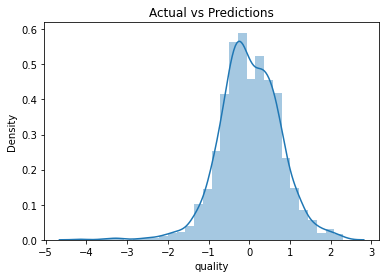

In [58]:
sns.distplot((y_test-pred),bins=30)
plt.title('Actual vs Predictions')

In [59]:

lf= pd.DataFrame({'Actual':y_test,'Predictions':pred})
lf['Predictions']= round(lf['Predictions'],2)
lf.head()



,Actual,Predictions
1045,5,5.82
4146,7,6.13
1382,6,4.81
5839,7,6.77
4427,5,5.54


### after removing outliers

## Z-score method for outlier removal

In [60]:
from sklearn.model_selection import cross_val_score,train_test_split
X=kf.loc[:, kf.columns != 'quality']
scaler = MinMaxScaler()
X[list(X.columns)]=scaler.fit_transform(X[list(X.columns)])
y=kf['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
pred = lr2.predict(X_test)
from sklearn import metrics
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, pred))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(y_test, pred))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared: ',lr2.score(X_train,y_train))
analysis_outlier["name_of_method"].append("Z-score outlier removal")
analysis_outlier["MAE"].append(metrics.mean_absolute_error(y_test, pred))
analysis_outlier["MSE"].append(metrics.mean_squared_error(y_test, pred))
analysis_outlier["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
analysis_outlier["R squared"].append(lr2.score(X_train,y_train))


MAE (Mean Absolute Error): 0.5392130097900668
MSE (Mean Square Error ): 0.48065609290143807
RMSE (Root Mean Square Error ): 0.6932936556044906
R squared:  0.32136710774638033


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


### In case of IQR for outlier removing method

In [61]:
from sklearn.model_selection import cross_val_score,train_test_split
X=df_out.loc[:, df_out.columns != 'quality']
scaler = MinMaxScaler()
X[list(X.columns)]=scaler.fit_transform(X[list(X.columns)])
y=df_out['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
pred = lr1.predict(X_test)
from sklearn import metrics
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, pred))
print('MSE (Mean Square Error ):', metrics.mean_squared_error(y_test, pred))
print('RMSE (Root Mean Square Error ):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared: ',lr1.score(X_train,y_train))
analysis_outlier["name_of_method"].append("IQR outlier removal")
analysis_outlier["MAE"].append(metrics.mean_absolute_error(y_test, pred))
analysis_outlier["MSE"].append(metrics.mean_squared_error(y_test, pred))
analysis_outlier["RMSE"].append(np.sqrt(metrics.mean_squared_error(y_test, pred)))
analysis_outlier["R squared"].append(lr2.score(X_train,y_train))


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


MAE (Mean Absolute Error): 0.4884256891760458
MSE (Mean Square Error ): 0.3781363950851821
RMSE (Root Mean Square Error ): 0.6149279592644834
R squared:  0.2821710378474487


In [62]:
analysis_outlier

{'name_of_method': ['with outliers',
  'Z-score outlier removal',
  'IQR outlier removal'],
 'MAE': [0.573160155650914, 0.5392130097900668, 0.4884256891760458],
 'MSE': [0.5475622807293987, 0.48065609290143807, 0.3781363950851821],
 'RMSE': [0.7399745135674598, 0.6932936556044906, 0.6149279592644834],
 'R squared': [0.31549951259175024, 0.32136710774638033, 0.2585368061358376]}

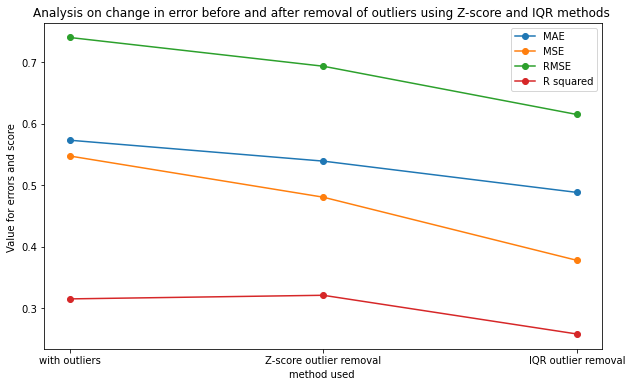

In [63]:
# Use Dictionary having required data to make graph
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [10, 6]
# for index in range(len(analysis_outlier["name_of_method"])):
#     print(list(analysis_outlier)[index])
x_axis=analysis_outlier["name_of_method"]
y_axis=analysis_outlier["MAE"]
plt.plot(x_axis,y_axis,label="MAE", marker='o')
y_axis1=analysis_outlier["MSE"]
plt.plot(x_axis,y_axis1,label="MSE", marker='o')
y_axis2=analysis_outlier["RMSE"]
plt.plot(x_axis,y_axis2,label="RMSE", marker='o')
y_axis3=analysis_outlier["R squared"]
plt.plot(x_axis,y_axis3,label="R squared", marker='o')
# plt.plot(recipesSize,percentageOfrecipesIncuisine)
plt.xlabel('method used ')
plt.ylabel("Value for errors and score ")
plt.title("Analysis on change in error before and after removal of outliers using Z-score and IQR methods ")

plt.legend(loc="upper right")
plt.show()

In [64]:
# from sklearn.ensemble import RandomForestRegressor

# regressor = RandomForestRegressor(n_estimators=20, random_state=0)
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)

## Implementation of classification on data after IQR

In [65]:
clf_data=df_out[:]

In [66]:
# tf["quality"]
clf_data1=clf_data[:]
# clf_data1["quality"]=clf_data1.apply(lambda row:  'good' if ( row.quality >=8 ) else ( 'avg' if (row.quality>= 4 and row.quality<= 7) else 'bad' )  , axis = 1)
clf_data1["quality"]=clf_data1.apply(lambda row:  'good' if ( row.quality >=6 ) else 'bad' , axis = 1)

<AxesSubplot:xlabel='quality', ylabel='count'>

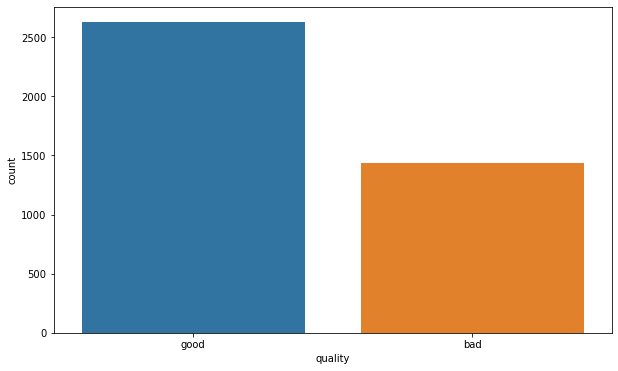

In [67]:
from scipy.stats import norm 
sns.countplot(x='quality', data=clf_data1)

In [68]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

In [69]:
X=clf_data1.loc[:, clf_data1.columns != 'quality']
scaler = MinMaxScaler()
# sc = StandardScaler()
# X=sc.fit_transform(X)
X[list(X.columns)]=scaler.fit_transform(X[list(X.columns)])
y=clf_data1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [70]:
# print("Accuracy:",metrics.accuracy_score(y_test, predict))
result_analysis_accuracy=[]
result_analysis_precision=[]
result_analysis_recall=[]
result_analysis_f1Score=[]
result_analysis_model_name=["DT","GNB","SVM","RF"]

### Decision Tree

In [71]:


decision_tree = tree.DecisionTreeClassifier(criterion = "gini")
decision_tree.fit(X_train,y_train)
y_test_pred = decision_tree.predict(X_test)
test_decision_accuracy_is=metrics.accuracy_score(y_test,y_test_pred)
# decision_tree_score_is = cross_val_score(estimator=decision_tree, X=X_train, y=Y_train, cv=5)
# depth_of_tree_x.append(depthis)
# accuracy_of_tree_y.append(decision_tree_score_is.mean())
# classification_data_en.columns
test_decision_accuracy_is

0.6858080393765381

Accuracy: 0.6858080393765381

Precision:  0.7609819121447028
Recall:  0.7484116899618806
F1_score:  0.7546444586803331

Accuracy Class bad is  0.5717592592592593
Accuracy Class good is  0.7484116899618806

Confusion Matrix  :- x axis => Predicted class and y axis => Actual class



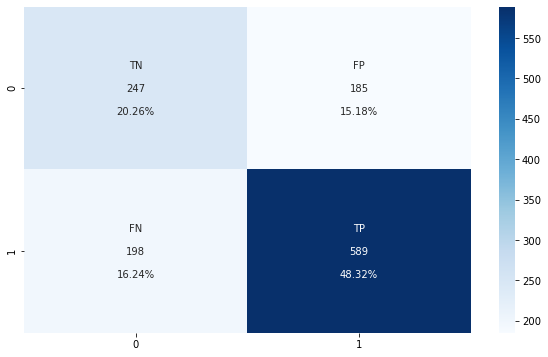

In [72]:
import seaborn as sns
from sklearn.metrics import classification_report

target_names = ['bad', 'good']
from sklearn.metrics import confusion_matrix
cmis = confusion_matrix(y_test, y_test_pred,labels=['bad', 'good'])

# # print("confusion matrix\n",cmis)
# print("\n")

category_belong =['TN','FP','FN','TP']
per_class_count = ["{0:0.0f}".format(value) for value in cmis.flatten()]
per_class_percent = ["{0:.2%}".format(value) for value in cmis.flatten()/np.sum(cmis)]
new_labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(category_belong,per_class_count,per_class_percent)]
new_labels1 = np.asarray(new_labels).reshape(2,2)

sns.heatmap(cmis, annot=new_labels1, fmt='', cmap='Blues')

# cmis = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
# print("accuracy per class")
# cmis.diagonal()
cmis_accuracy_perclass = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
accuracy=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:",accuracy)
precision = cmis[1,1] / sum(cmis[:,1])
recall    = cmis[1,1] / sum(cmis[1,:])
f1_score  = 2*precision*recall / (precision + recall)
print("\nPrecision: ",precision)
print("Recall: ",recall)
print("F1_score: ",f1_score)


cma=cmis_accuracy_perclass.diagonal()
print("\nAccuracy Class bad is ",cma[0])
print("Accuracy Class good is ",cma[1])
print("\nConfusion Matrix  :- x axis => Predicted class and y axis => Actual class\n")

result_analysis_accuracy.append(accuracy)
result_analysis_precision.append(precision)
result_analysis_recall.append(recall)
result_analysis_f1Score.append(f1_score)
# print("\nClassification Reporst is \n")
# print(classification_report(y_test,predict))

### GaussianNB

In [73]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
# X_train, X_test, y_train, y_test
model.fit(X_train,y_train)
# multinom_naive_bayes,X_train,Y_train
naive_Y_predict=model.predict(X_test)
naive_bayes_accuracy=metrics.accuracy_score(y_test,naive_Y_predict)
naive_bayes_accuracy

0.7292863002461034

Accuracy: 0.7292863002461034

Precision:  0.799475753604194
Recall:  0.7750952986022872
F1_score:  0.7870967741935484

Accuracy Class bad is  0.6458333333333334
Accuracy Class good is  0.7750952986022872

Confusion Matrix  :- x axis => Predicted class and y axis => Actual class



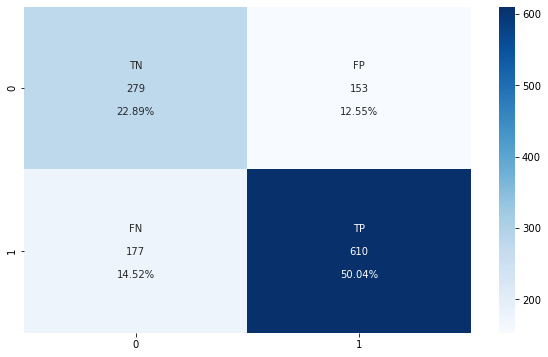

In [74]:
import seaborn as sns
from sklearn.metrics import classification_report

target_names = ['bad', 'good']
from sklearn.metrics import confusion_matrix
cmis = confusion_matrix(y_test, naive_Y_predict,labels=['bad', 'good'])

# # print("confusion matrix\n",cmis)
# print("\n")

category_belong =['TN','FP','FN','TP']
per_class_count = ["{0:0.0f}".format(value) for value in cmis.flatten()]
per_class_percent = ["{0:.2%}".format(value) for value in cmis.flatten()/np.sum(cmis)]
new_labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(category_belong,per_class_count,per_class_percent)]
new_labels1 = np.asarray(new_labels).reshape(2,2)

sns.heatmap(cmis, annot=new_labels1, fmt='', cmap='Blues')

# cmis = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
# print("accuracy per class")
# cmis.diagonal()
cmis_accuracy_perclass = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
accuracy=metrics.accuracy_score(y_test, naive_Y_predict)
print("Accuracy:",accuracy)
precision = cmis[1,1] / sum(cmis[:,1])
recall    = cmis[1,1] / sum(cmis[1,:])
f1_score  = 2*precision*recall / (precision + recall)
print("\nPrecision: ",precision)
print("Recall: ",recall)
print("F1_score: ",f1_score)


cma=cmis_accuracy_perclass.diagonal()
print("\nAccuracy Class bad is ",cma[0])
print("Accuracy Class good is ",cma[1])
print("\nConfusion Matrix  :- x axis => Predicted class and y axis => Actual class\n")

result_analysis_accuracy.append(accuracy)
result_analysis_precision.append(precision)
result_analysis_recall.append(recall)
result_analysis_f1Score.append(f1_score)
# print("\nClassification Reporst is \n")
# print(classification_report(y_test,predict))

### svm

In [75]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(gamma='scale') 
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7858900738310091


Accuracy: 0.7858900738310091

Precision:  0.7988636363636363
Recall:  0.8932655654383735
F1_score:  0.8434313137372526

Accuracy Class 0 is  0.5902777777777778
Accuracy Class 1 is  0.8932655654383735

Confusion Matrix  :- x axis => Predicted class and y axis => Actual class



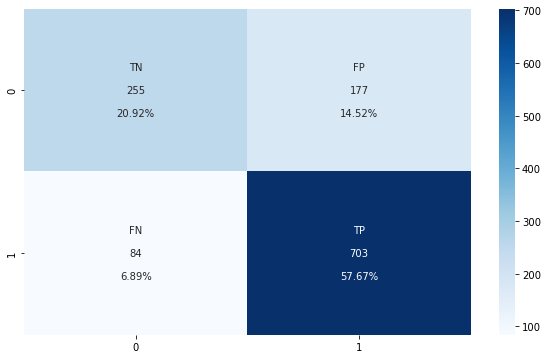

In [76]:
import seaborn as sns
from sklearn.metrics import classification_report

target_names = ['bad', 'good']
from sklearn.metrics import confusion_matrix
cmis = confusion_matrix(y_test, y_pred,labels=['bad', 'good'])

# # print("confusion matrix\n",cmis)
# print("\n")

category_belong =['TN','FP','FN','TP']
per_class_count = ["{0:0.0f}".format(value) for value in cmis.flatten()]
per_class_percent = ["{0:.2%}".format(value) for value in cmis.flatten()/np.sum(cmis)]
new_labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(category_belong,per_class_count,per_class_percent)]
new_labels1 = np.asarray(new_labels).reshape(2,2)

sns.heatmap(cmis, annot=new_labels1, fmt='', cmap='Blues')

# cmis = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
# print("accuracy per class")
# cmis.diagonal()
cmis_accuracy_perclass = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
precision = cmis[1,1] / sum(cmis[:,1])
recall    = cmis[1,1] / sum(cmis[1,:])
f1_score  = 2*precision*recall / (precision + recall)
print("\nPrecision: ",precision)
print("Recall: ",recall)
print("F1_score: ",f1_score)


cma=cmis_accuracy_perclass.diagonal()
print("\nAccuracy Class 0 is ",cma[0])
print("Accuracy Class 1 is ",cma[1])
print("\nConfusion Matrix  :- x axis => Predicted class and y axis => Actual class\n")

result_analysis_accuracy.append(accuracy)
result_analysis_precision.append(precision)
result_analysis_recall.append(recall)
result_analysis_f1Score.append(f1_score)
# print("\nClassification Reporst is \n")
# print(classification_report(y_test,predict))

### Random FOrest

In [77]:
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(n_estimators = 100)   
rf_clf.fit(X_train, y_train) 
rf_clf_y_pred = rf_clf.predict(X_test) 
rf_clf_accuracy=metrics.accuracy_score(y_test,rf_clf_y_pred)
rf_clf_accuracy

0.77850697292863

In [78]:
set(rf_clf_y_pred)

{'bad', 'good'}

Accuracy: 0.77850697292863

Precision:  0.8051948051948052
Recall:  0.866581956797967
F1_score:  0.8347613219094248

Accuracy Class 0 is  0.6180555555555556
Accuracy Class 1 is  0.866581956797967

Confusion Matrix  :- x axis => Predicted class and y axis => Actual class



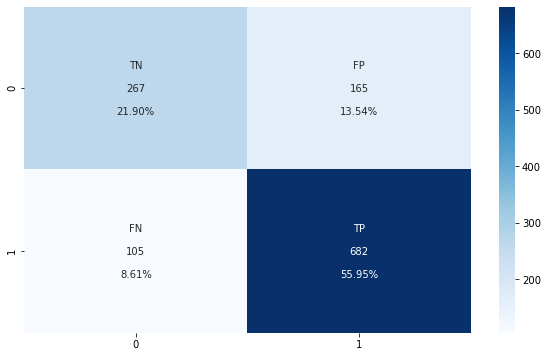

In [79]:
import seaborn as sns
from sklearn.metrics import classification_report

target_names = ['bad', 'good']
from sklearn.metrics import confusion_matrix
cmis = confusion_matrix(y_test, rf_clf_y_pred,labels=['bad', 'good'])

# # print("confusion matrix\n",cmis)
# print("\n")

category_belong =['TN','FP','FN','TP']
per_class_count = ["{0:0.0f}".format(value) for value in cmis.flatten()]
per_class_percent = ["{0:.2%}".format(value) for value in cmis.flatten()/np.sum(cmis)]
new_labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in zip(category_belong,per_class_count,per_class_percent)]
new_labels1 = np.asarray(new_labels).reshape(2,2)

sns.heatmap(cmis, annot=new_labels1, fmt='', cmap='Blues')

# cmis = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
# print("accuracy per class")
# cmis.diagonal()
cmis_accuracy_perclass = cmis.astype('float') / cmis.sum(axis=1)[:, np.newaxis]
accuracy=metrics.accuracy_score(y_test, rf_clf_y_pred)
print("Accuracy:",accuracy)
precision = cmis[1,1] / sum(cmis[:,1])
recall    = cmis[1,1] / sum(cmis[1,:])
f1_score  = 2*precision*recall / (precision + recall)
print("\nPrecision: ",precision)
print("Recall: ",recall)
print("F1_score: ",f1_score)


cma=cmis_accuracy_perclass.diagonal()
print("\nAccuracy Class 0 is ",cma[0])
print("Accuracy Class 1 is ",cma[1])
print("\nConfusion Matrix  :- x axis => Predicted class and y axis => Actual class\n")

result_analysis_accuracy.append(accuracy)
result_analysis_precision.append(precision)
result_analysis_recall.append(recall)
result_analysis_f1Score.append(f1_score)
# print("\nClassification Reporst is \n")
# print(classification_report(y_test,predict))

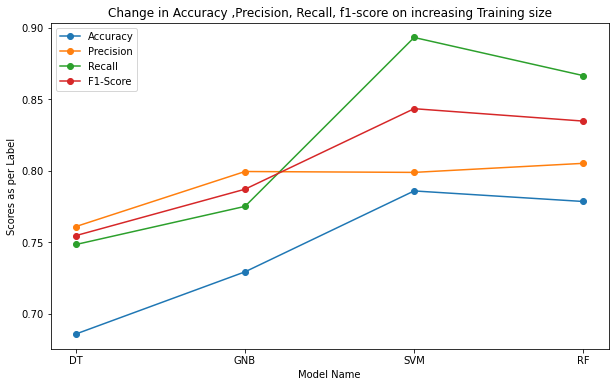

In [80]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(result_analysis_model_name,result_analysis_accuracy, marker='o',label="Accuracy")
plt.plot(result_analysis_model_name,result_analysis_precision, marker='o',label="Precision")
plt.plot(result_analysis_model_name,result_analysis_recall, marker='o',label="Recall")
plt.plot(result_analysis_model_name,result_analysis_f1Score, marker='o',label="F1-Score")
plt.xlabel('Model Name')
plt.ylabel("Scores as per Label")
plt.title('Change in Accuracy ,Precision, Recall, f1-score on increasing Training size')

plt.legend()
plt.show()